In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense 
from tensorflow.keras.datasets import mnist

In [35]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [36]:
#normalize data using min max normalization
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [37]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))      
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8605 - loss: 0.4576 - val_accuracy: 0.9758 - val_loss: 0.0844
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9794 - loss: 0.0650 - val_accuracy: 0.9812 - val_loss: 0.0627
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9862 - loss: 0.0429 - val_accuracy: 0.9864 - val_loss: 0.0475
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9899 - loss: 0.0335 - val_accuracy: 0.9878 - val_loss: 0.0373
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9892 - val_loss: 0.0358


In [40]:
#evaluate the model
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f'baseline model Test accuracy{test_accuracy:4f}')

313/313 - 0s - 1ms/step - accuracy: 0.9895 - loss: 0.0324
baseline model Test accuracy0.989500


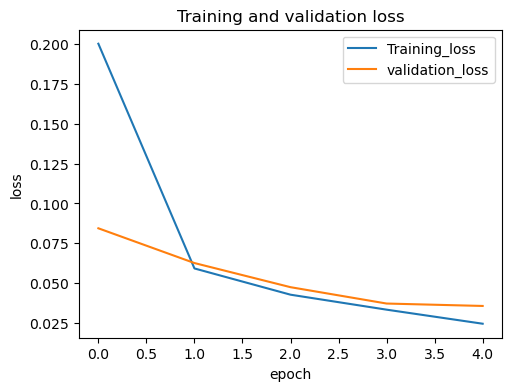

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

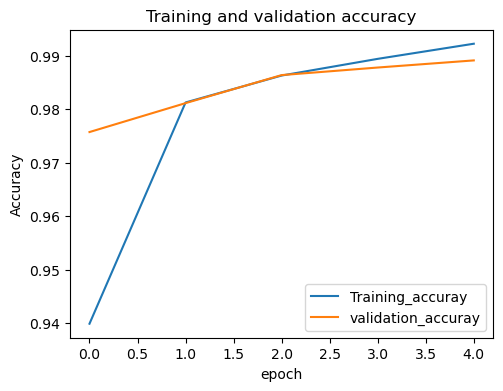

In [42]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training_accuray')
plt.plot(history.history['val_accuracy'],label='validation_accuray')
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
